<a href="https://colab.research.google.com/github/Tibebuga/Deep_learning/blob/main/prediction_animal_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us start by importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.optimize import curve_fit


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Understanding the structure of the data**

First load the data using pandas library and list the first and last 5 rows

In [3]:
# Read the xlsx file

df = pd.read_excel('/content/drive/MyDrive/Upwork-project-prediction/excel_correct_DOB.xlsx')
# returns the first 5 rows
df.head()


,AnimalID,Sex,Species,Origin,Lot,DOB,Date of Weigh,Weigh,Location at the Time of Weighting,Current Location,Diarrhea in the past 30 days from weight collection,Status
0,011A55,F,Common Marmoset,NaN,WWP-10,2010-04-09,2010-10-06,0.15,Q22C,InactiveMiami,No,Sold
1,011A55,F,Common Marmoset,NaN,WWP-10,2010-04-09,2011-04-04,0.18,Q23A,InactiveMiami,No,Sold
2,011A55,F,Common Marmoset,NaN,WWP-10,2010-04-09,2011-07-06,0.20,Q23C,InactiveMiami,No,Sold
3,0212322A,F,Cynomolgus,China,WWP-12,2012-07-23,2013-02-14,1.06,InactiveMiami,InactiveMiami,No,Sold
4,0212322A,F,Cynomolgus,China,WWP-12,2012-07-23,2013-10-17,1.60,InactiveMiami,InactiveMiami,No,Sold


In [4]:
# returns the last 5 rows
df.tail()

,AnimalID,Sex,Species,Origin,Lot,DOB,Date of Weigh,Weigh,Location at the Time of Weighting,Current Location,Diarrhea in the past 30 days from weight collection,Status
41643,y0611008A,M,Cynomolgus,China,WWP-12,2012-09-25,2015-11-17,3.44,InactiveMiami,InactiveMiami,No,Sold
41644,y0611008A,M,Cynomolgus,China,WWP-12,2012-09-25,2015-12-28,3.52,InactiveMiami,InactiveMiami,No,Sold
41645,y0611008A,M,Cynomolgus,China,WWP-12,2012-09-25,2016-01-13,3.60,InactiveMiami,InactiveMiami,No,Sold
41646,y0611008A,M,Cynomolgus,China,WWP-12,2012-09-25,2016-02-24,3.60,InactiveMiami,InactiveMiami,No,Sold
41647,y0611008A,M,Cynomolgus,China,WWP-12,2012-09-25,2016-03-04,3.45,InactiveMiami,InactiveMiami,No,Sold




"Compute the ages of the animals by subtracting the Date of Birth (DOB) from the Date of Weigh columns. Add the ages to the DataFrame with the column name 'Age'."

In [5]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['Date of Weigh'] = pd.to_datetime(df['Date of Weigh'])
 #Calculate age in years
df['Age'] = (df['Date of Weigh'] - df['DOB']).dt.days / 365.25  # dividing by average days in a year

df['Age']

,Age
0,0.492813
1,0.985626
2,1.240246
3,0.563997
4,1.234771
...,...
41643,3.143053
41644,3.255305
41645,3.299110
41646,3.414100


In [6]:
print(df.columns) #print column names

Index(['AnimalID', 'Sex', 'Species', 'Origin', 'Lot', 'DOB', 'Date of Weigh',
       'Weigh', 'Location at the Time of Weighting', 'Current Location',
       'Diarrhea in the past 30 days from weight collection', 'Status', 'Age'],
      dtype='object')


In [7]:
df.shape #shape of the data

(41648, 13)

In [8]:
# Use info() to print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41648 entries, 0 to 41647
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   AnimalID                                             41648 non-null  object        
 1   Sex                                                  41648 non-null  object        
 2   Species                                              41648 non-null  object        
 3   Origin                                               40681 non-null  object        
 4   Lot                                                  41648 non-null  object        
 5   DOB                                                  41490 non-null  datetime64[ns]
 6   Date of Weigh                                        41648 non-null  datetime64[ns]
 7   Weigh                                                41644 non-null  float64       
 

In [9]:
print(df['Diarrhea in the past 30 days from weight collection'].value_counts())

Diarrhea in the past 30 days from weight collection
No     41339
Yes      309
Name: count, dtype: int64


Check missing values

In [10]:
print(df.isna().sum()) ## Check missing values
print('*' * 80)
print(df.info())

AnimalID                                                 0
Sex                                                      0
Species                                                  0
Origin                                                 967
Lot                                                      0
DOB                                                    158
Date of Weigh                                            0
Weigh                                                    4
Location at the Time of Weighting                        0
Current Location                                         0
Diarrhea in the past 30 days from weight collection      0
Status                                                   0
Age                                                    158
dtype: int64
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41648 entries, 0 to 41647
Data columns (total 13 columns):
 #   Column                   

#### Observations:
- All columns except Origin and Weigh, DOB and Age have 41648 observations (and no missing values).
-However, Origin and Weigh have 967 and 4, missing and/or null values, respectively.
DOB and Age have 158 missing values.

In [11]:
df.describe().T
#df.describe(exclude = 'number').T

,count,mean,min,25%,50%,75%,max,std
DOB,41490,2020-01-29 04:14:34.620390656,2005-07-08 00:00:00,2018-04-01 00:00:00,2021-03-16 00:00:00,2022-04-28 00:00:00,2024-04-11 00:00:00,NaN
Date of Weigh,41648,2021-07-16 21:29:50.318863104,1999-07-26 00:00:00,2020-02-13 00:00:00,2022-07-01 00:00:00,2023-06-26 00:00:00,2024-04-12 00:00:00,NaN
Weigh,41644.0,1.891841,0.0,1.04,1.55,2.25,1035.0,5.514125
Age,41490.0,1.464373,-14.53525,0.574949,1.092402,1.924709,16.616016,1.536589


#### Observations:
- The mean, std, min and max of the weight are,1.89, 5.5, 0.0, and 1035,  respetively. Seems that 1035 is an outlier/error?
- The mean, std, min and max of the Age  are,1.46, 1.5, -14, and 16.6,  respetively. Seems that the min value is error and the max is outlier?


In [12]:
min_index_age = df['Age'].idxmin()
df.iloc[min_index_age]

,41361
AnimalID,773
Sex,M
Species,Common Marmoset
Origin,NaN
Lot,WWP-15
DOB,2015-06-19 00:00:00
Date of Weigh,2000-12-05 00:00:00
Weigh,4.71
Location at the Time of Weighting,11C15
Current Location,InactiveImmokalee


Seems that DOB 2015-06-19  and Date of Weigh (2000-12-05) are not in the right order.

In [13]:
max_index_B = df['Weigh'].idxmax()
df.iloc[max_index_B]


,36539
AnimalID,23CC-039
Sex,M
Species,Cynomolgus
Origin,China
Lot,WWP-23
DOB,2023-02-01 00:00:00
Date of Weigh,2023-10-27 00:00:00
Weigh,1035.0
Location at the Time of Weighting,InactiveDoral
Current Location,FC-210


Seems that the of Cynomolgus Species and Origin from China has weight of 1035 is an outlier.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

<Axes: xlabel='Sex', ylabel='Count'>

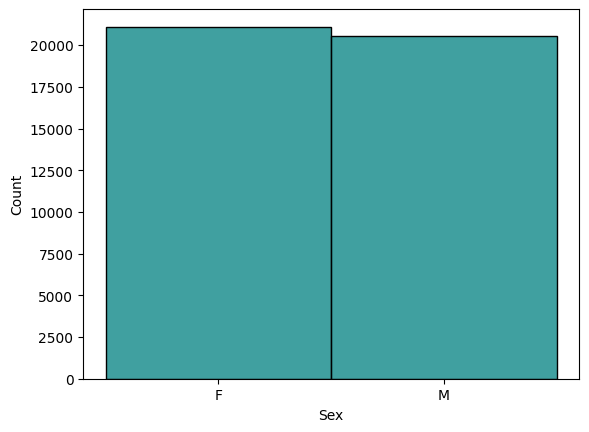

In [14]:
sns.histplot(x=df.Sex,  color="teal", kde=False, bins="auto")

Species
Cynomolgus                   38772
Rhesus                        1306
Common Marmoset                679
African Green (Caribbean)      675
Squirrel Monkey                126
Capuchin                        48
Olive Baboon                    42
Name: count, dtype: int64


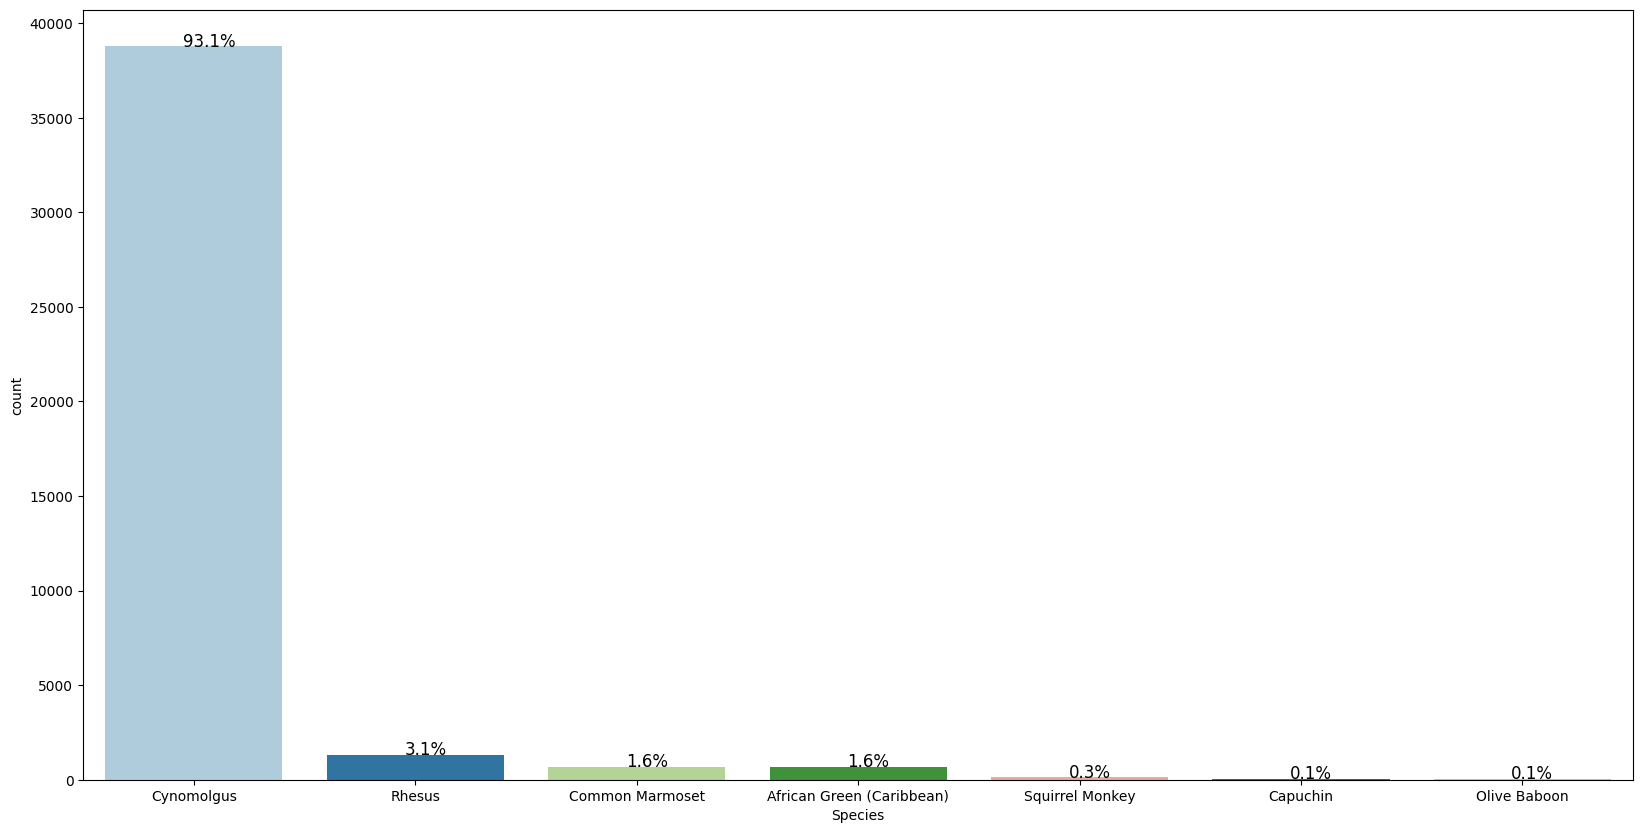

In [15]:
print(df['Species'].value_counts())
total = len(df['Species']) # Length of the column
plt.figure(figsize = (20, 10))
ax =sns.countplot(x=df.Species,color="red", palette='Paired',order=df['Species'].value_counts().index)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

Origin
Cambodia        18045
China           14305
Philippines      3326
Vietnam          2346
Indonesia        1072
Mauritius         529
South Africa      415
St. Kitts         304
USA               265
India              64
Guyana             10
Name: count, dtype: int64


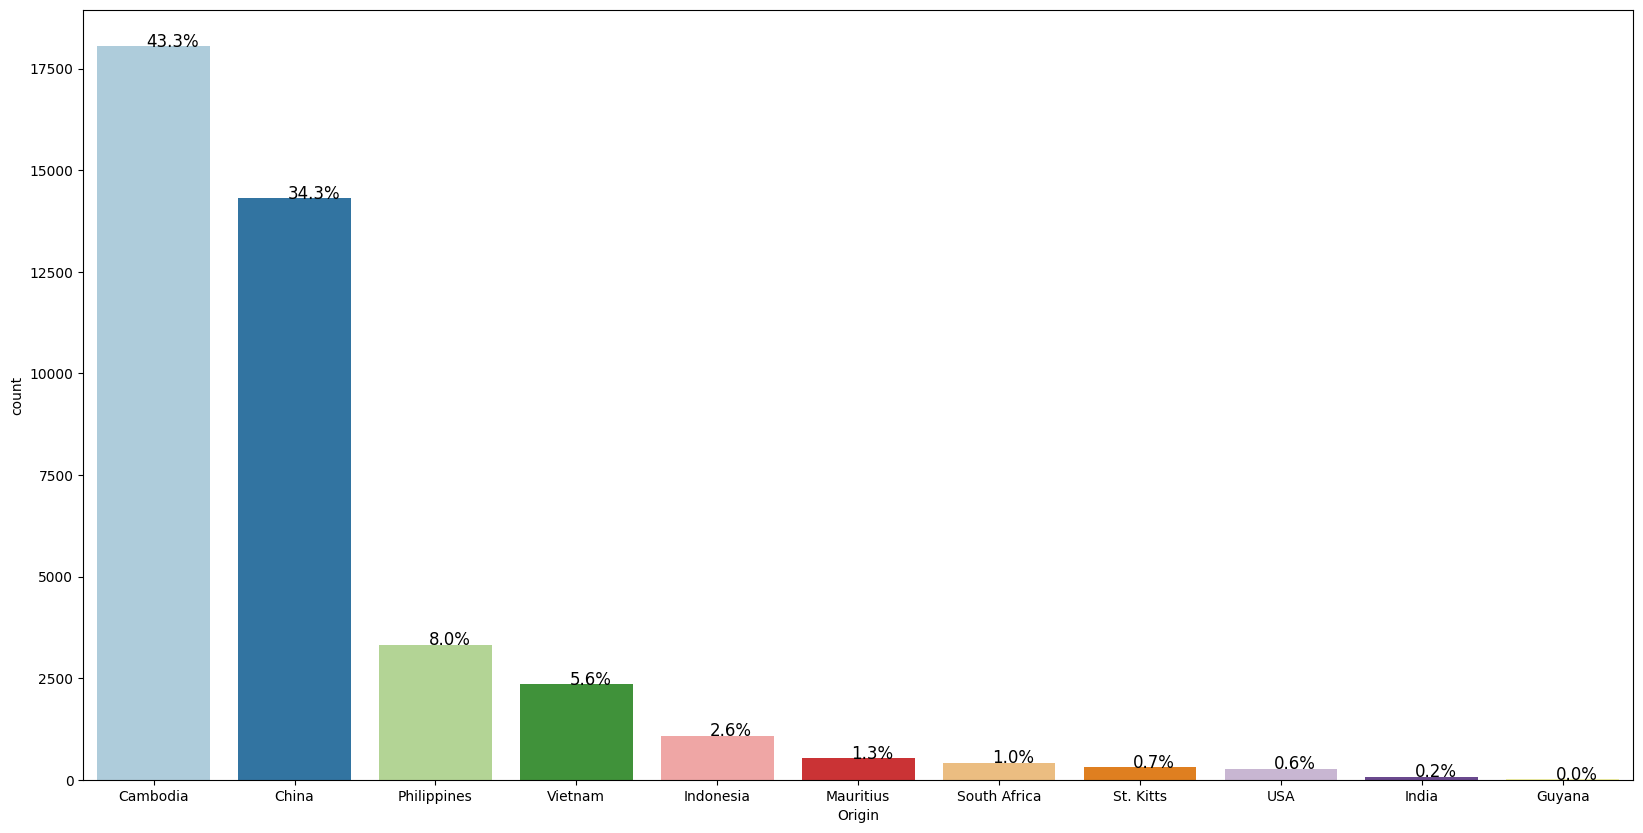

In [16]:
print(df['Origin'].value_counts())
total = len(df['Origin']) # Length of the column
plt.figure(figsize = (20, 10))
ax =sns.countplot(x=df.Origin,color="red", palette='Paired',order=df['Origin'].value_counts().index)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

Location at the Time of Weighting
InactiveMiami    17568
InactiveDoral    14424
FC-14             9177
B-50               165
23                 160
Q23A                35
Q23C                32
11C19               28
11C15               15
Q22C                10
B-47                 8
11C2                 4
11C4                 3
59                   3
11                   2
26                   2
117                  2
46                   2
FC-60                1
54                   1
FC-44                1
Q23B                 1
A-24                 1
FC-7                 1
36                   1
FC-47                1
Name: count, dtype: int64


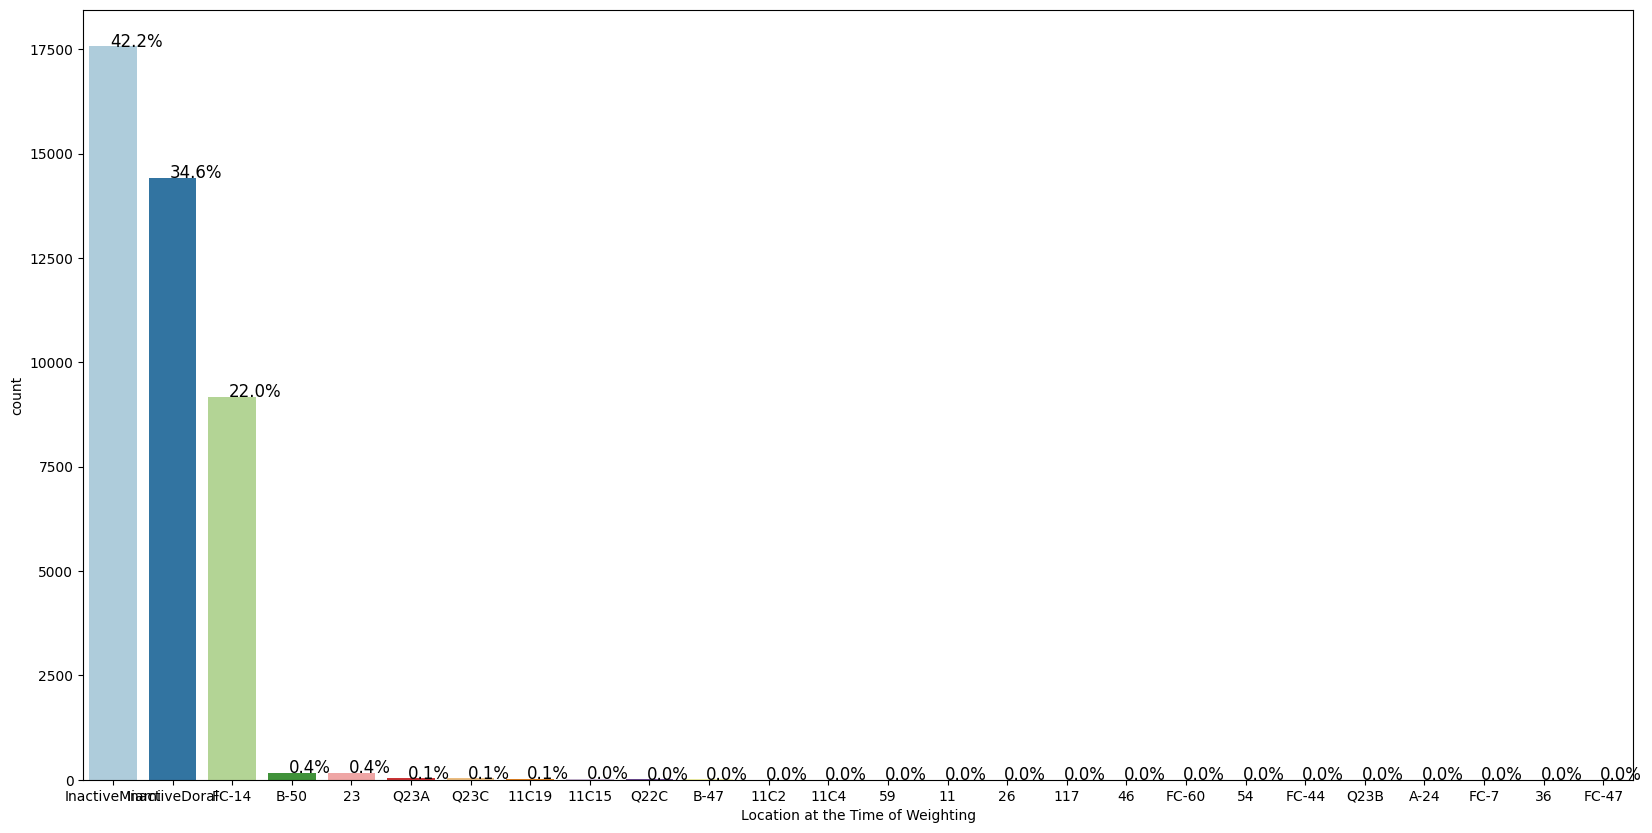

In [17]:
print(df['Location at the Time of Weighting'].value_counts())
total = len(df['Location at the Time of Weighting']) # Length of the column
plt.figure(figsize = (20, 10))
ax =sns.countplot(x=df['Location at the Time of Weighting'],color="red", palette='Paired',order=df['Location at the Time of Weighting'].value_counts().index)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

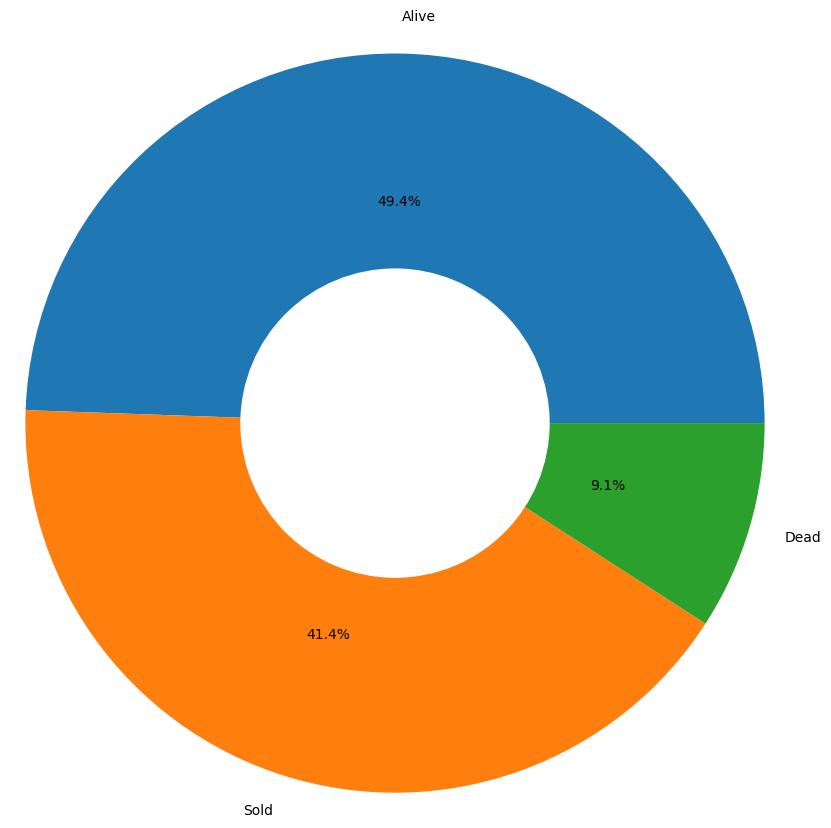

In [18]:
# pie plot
import matplotlib.patches

plt.figure(figsize = (20, 10))
plt.pie(df.Status.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Alive', 'Sold','Dead'])

#add a circle at the center
circle =  plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)



# display the plot
plt.show()

<Axes: xlabel='Weigh'>

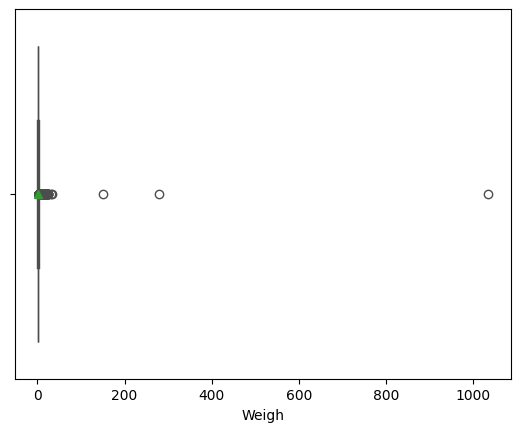

In [19]:
sns.boxplot(x=df.Weigh,showmeans=True, color='red')
#plt.xlim(0, 20)

(0.0, 20.0)

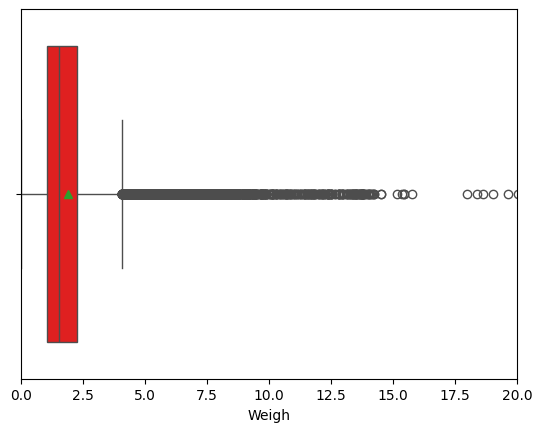

In [20]:
sns.boxplot(x=df.Weigh,showmeans=True, color='red')
plt.xlim(0, 20)

2 2


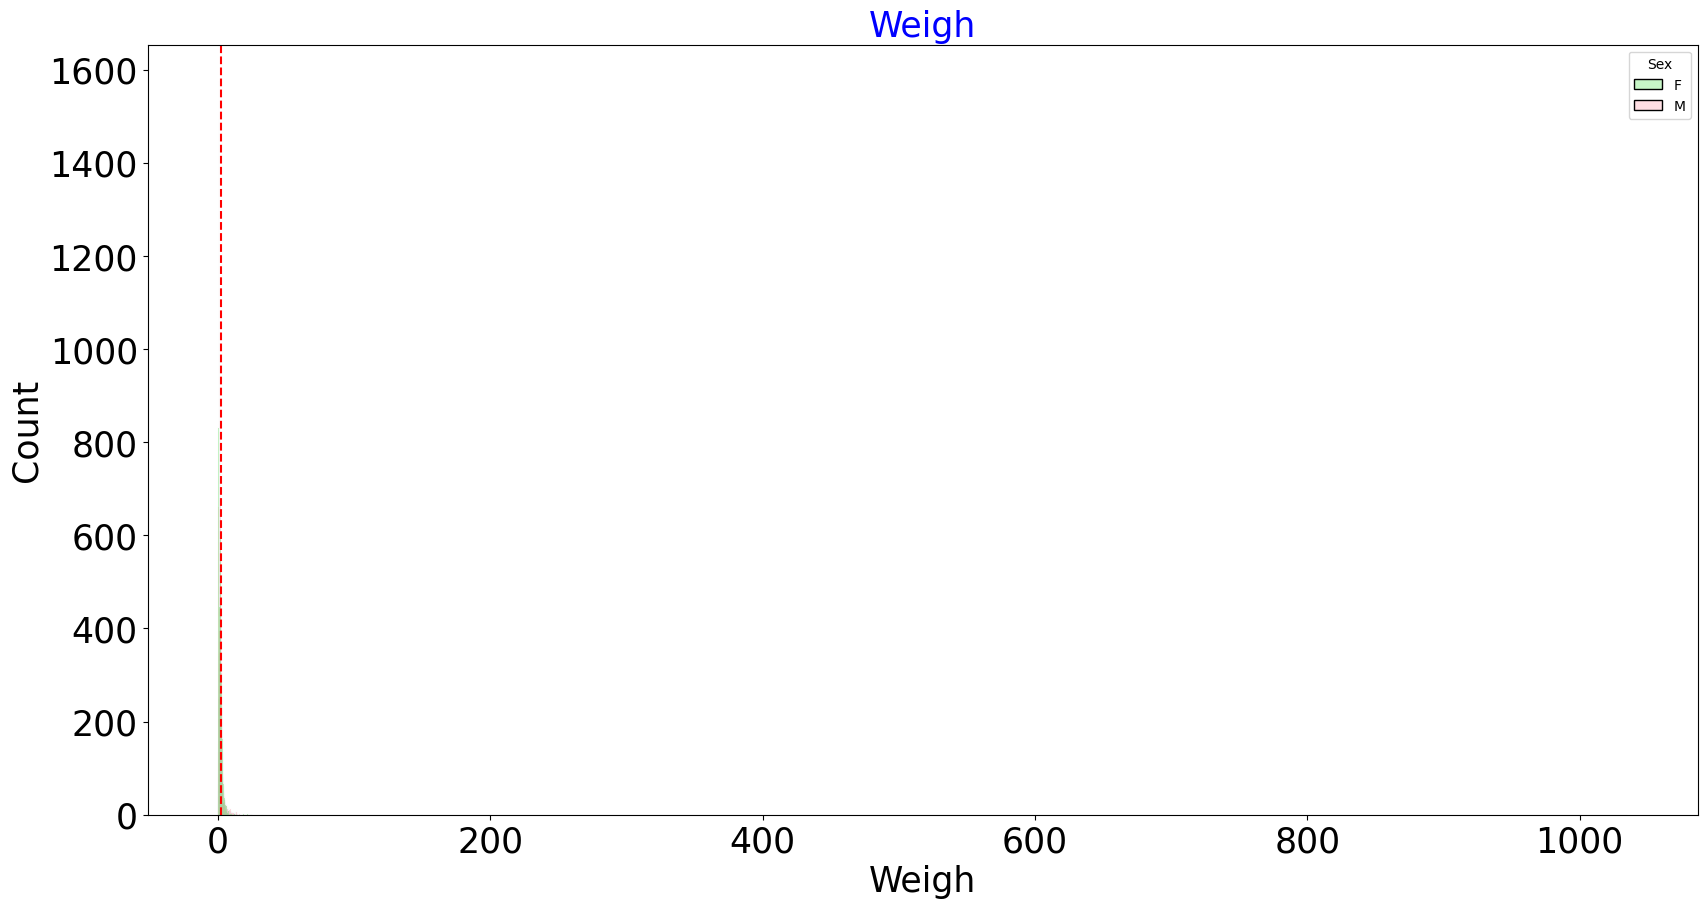

In [21]:
  # Weigh

print(round(np.mean(df.Weigh)),2)

#plot
plt.figure(figsize = (20, 10))
sns.histplot(data=df,x=df['Weigh'], kde=False,color="blue", bins="auto", hue='Sex', palette=['lightgreen', 'pink'])
plt.axvline(np.mean(df.Weigh), color='red', linestyle='--')      # Add mean to the histogram
plt.axvline(np.median(df.Weigh), color='green', linestyle='-') # Add median to the histogram
plt.xlabel("Weigh", size=25)
plt.ylabel("Count", size=25)
plt.title("Weigh", size=25, color= 'blue')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.xlim(0, 3)
#plt.tick_params(axis='both', which='major', labelsize=20')
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.show()

2 2


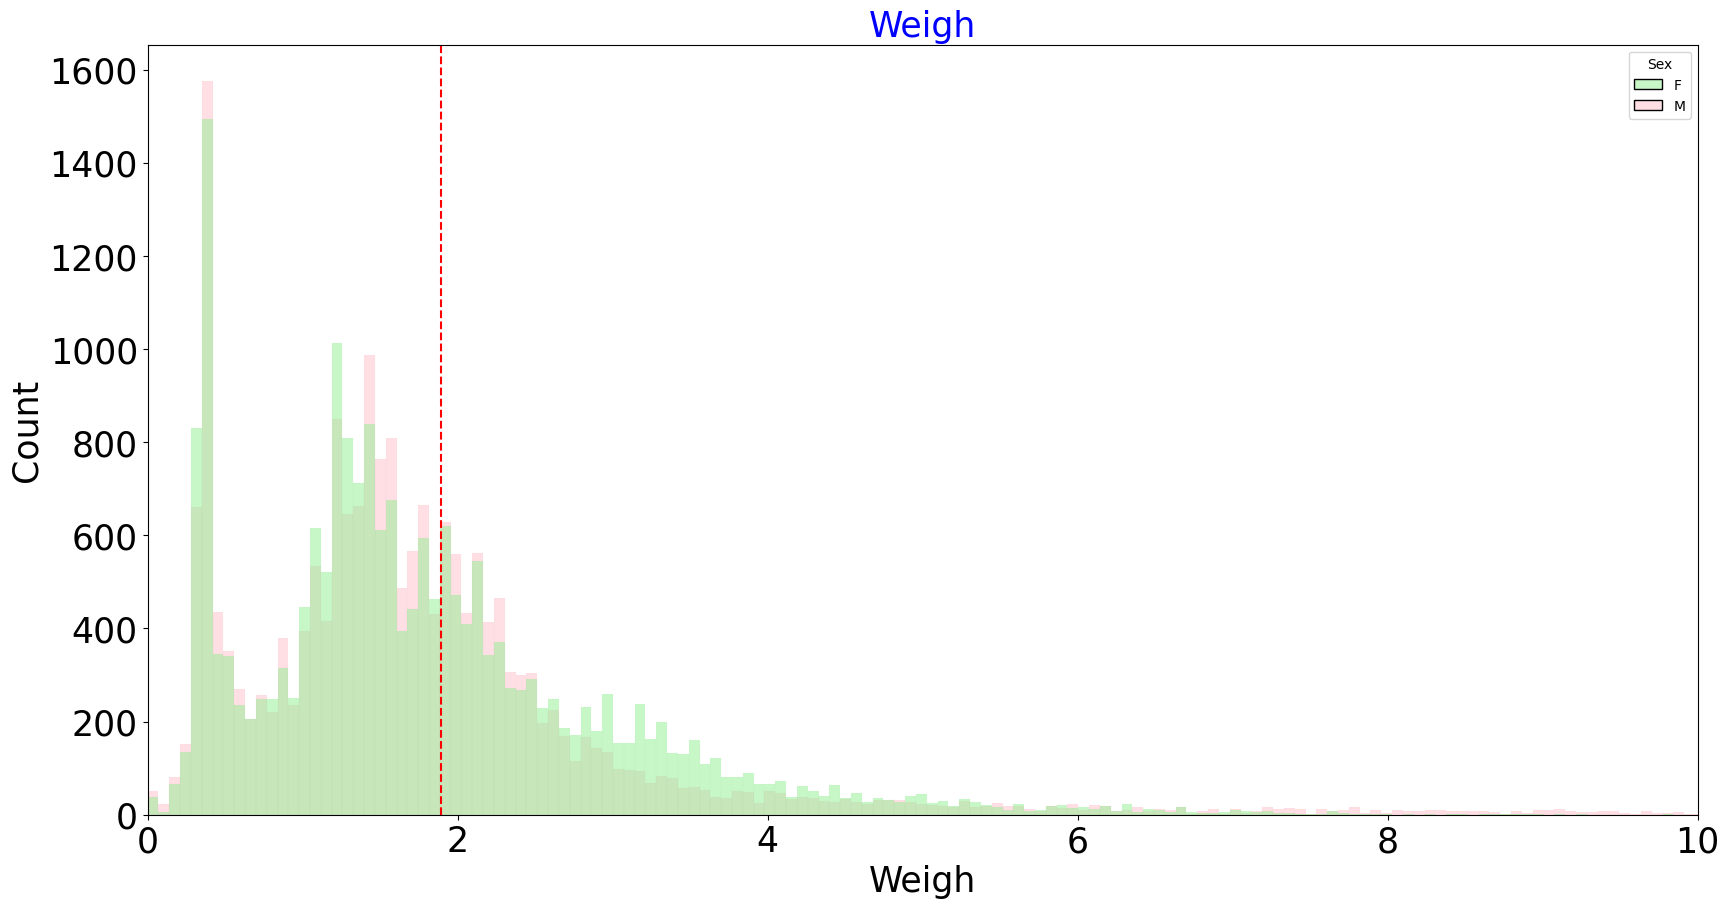

In [22]:
  # Weigh

print(round(np.mean(df.Weigh)),2)

#plot
plt.figure(figsize = (20, 10))
sns.histplot(data=df,x=df['Weigh'], kde=False,color="blue", bins="auto", hue='Sex', palette=['lightgreen', 'pink'])
plt.axvline(np.mean(df.Weigh), color='red', linestyle='--')      # Add mean to the histogram
plt.axvline(np.median(df.Weigh), color='green', linestyle='-') # Add median to the histogram
plt.xlabel("Weigh", size=25)
plt.ylabel("Count", size=25)
plt.title("Weigh", size=25, color= 'blue')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 10)
#plt.tick_params(axis='both', which='major', labelsize=20')
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.show()

1 2


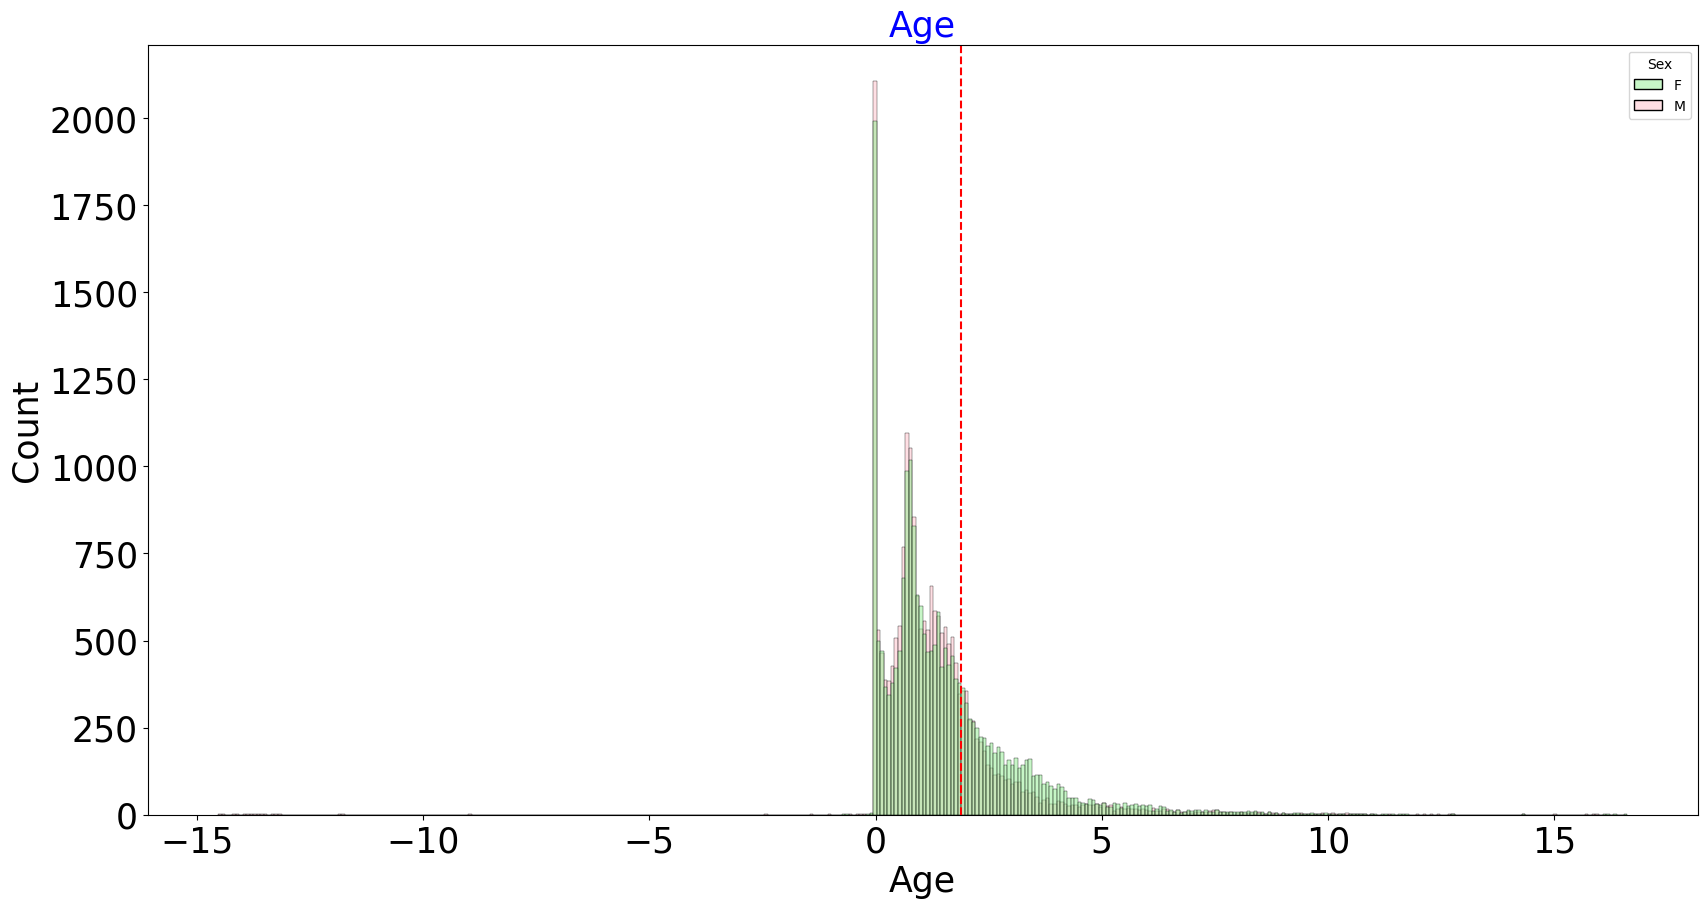

In [23]:
#age
print(round(np.mean(df.Age)),2)

#plot
plt.figure(figsize = (20, 10))
sns.histplot(data=df,x=df['Age'], kde=False,color="blue", bins="auto", hue='Sex', palette=['lightgreen', 'pink'])
plt.axvline(np.mean(df.Weigh), color='red', linestyle='--')      # Add mean to the histogram
plt.axvline(np.median(df.Weigh), color='green', linestyle='-') # Add median to the histogram
plt.xlabel("Age", size=25)
plt.ylabel("Count", size=25)
plt.title("Age", size=25, color= 'blue')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.xlim(0, 3)
#plt.tick_params(axis='both', which='major', labelsize=20')
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.show()

1 2


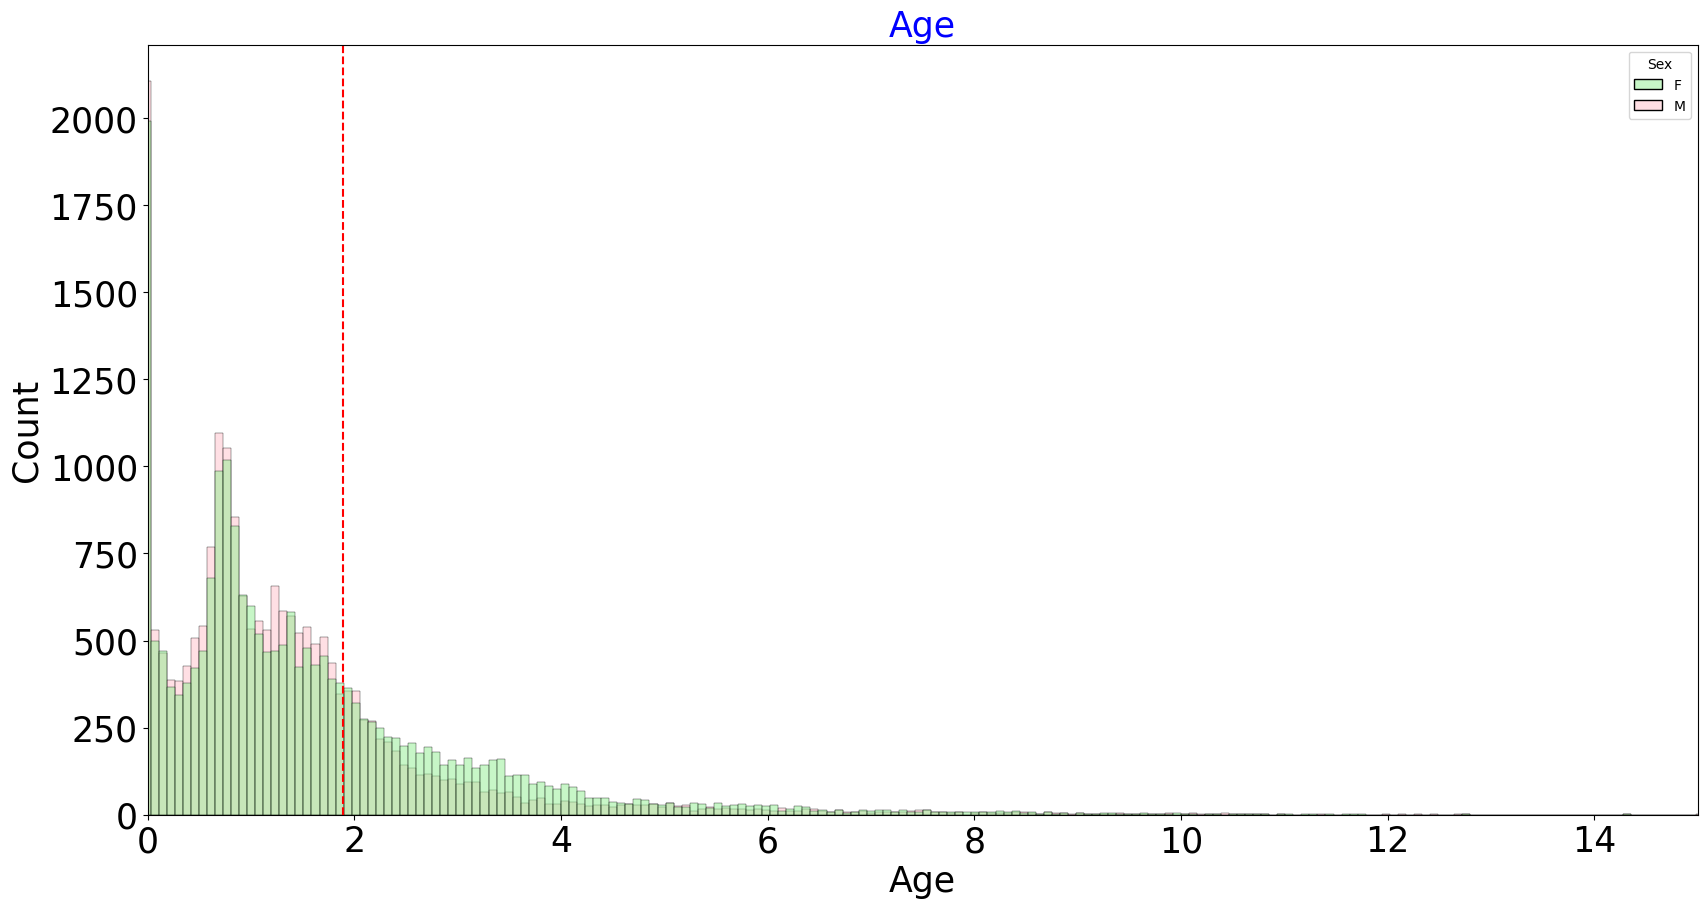

In [24]:
#age
print(round(np.mean(df.Age)),2)

#plot
plt.figure(figsize = (20, 10))
sns.histplot(data=df,x=df['Age'], kde=False,color="blue", bins="auto", hue='Sex', palette=['lightgreen', 'pink'])
plt.axvline(np.mean(df.Weigh), color='red', linestyle='--')      # Add mean to the histogram
plt.axvline(np.median(df.Weigh), color='green', linestyle='-') # Add median to the histogram
plt.xlabel("Age", size=25)
plt.ylabel("Count", size=25)
plt.title("Age", size=25, color= 'blue')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 15)
#plt.tick_params(axis='both', which='major', labelsize=20')
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.show()

<Axes: xlabel='Age'>

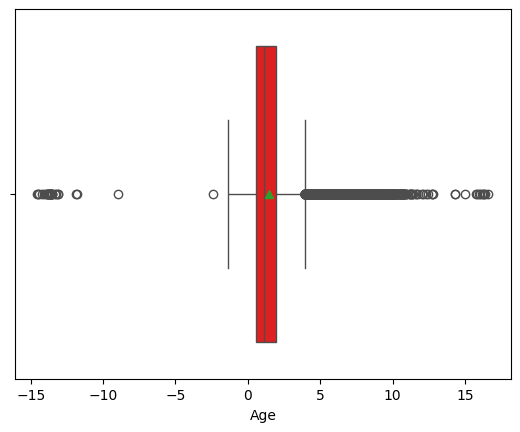

In [25]:
sns.boxplot(x=df.Age,showmeans=True, color='red')
#plt.xlim(0, 20)

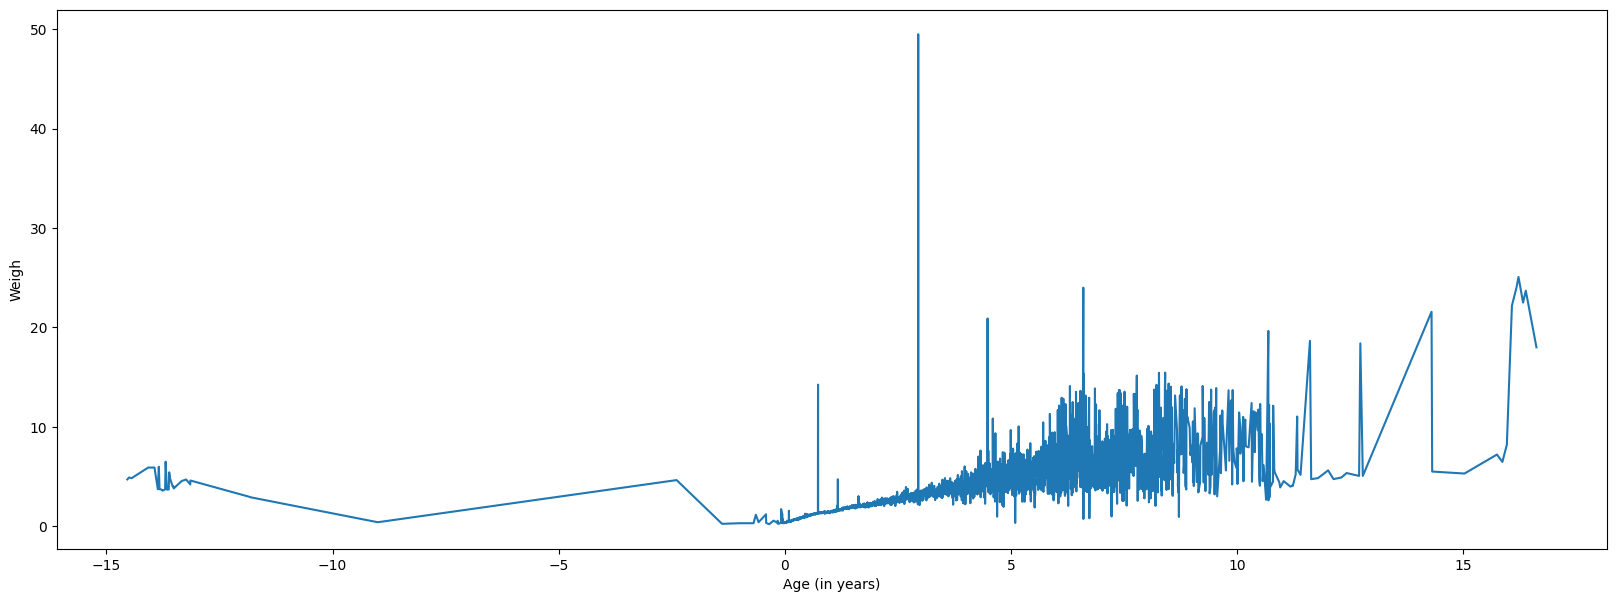

In [26]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "Age", y = "Weigh", ci = 0, data = df)
plt.ylabel('Weigh')
plt.xlabel('Age (in years)')
plt.show()

Filter and clean up the data

In [27]:
df_cleaned = df.dropna() #drop NAN values
df_cleaned.info()
df_filtered = df_cleaned[(df_cleaned['Age'] >= 0) & (df_cleaned['Weigh'] < df_cleaned['Weigh'].std())]
#f_filtered = df_cleaned[(df_cleaned['age'] > 0) & (df_cleaned['Species'] == 'Cynomolgus') & (df_cleaned['Origin'] == 'Cambodia')&(df_cleaned['Weigh'] < df_cleaned['Weigh'].std())]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40521 entries, 3 to 41647
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   AnimalID                                             40521 non-null  object        
 1   Sex                                                  40521 non-null  object        
 2   Species                                              40521 non-null  object        
 3   Origin                                               40521 non-null  object        
 4   Lot                                                  40521 non-null  object        
 5   DOB                                                  40521 non-null  datetime64[ns]
 6   Date of Weigh                                        40521 non-null  datetime64[ns]
 7   Weigh                                                40521 non-null  float64       
 8   L



"Let's exclude artifacts, including all ages less than 0, and disregard outliers in the weigh data by ignoring values greater than one standard deviation."

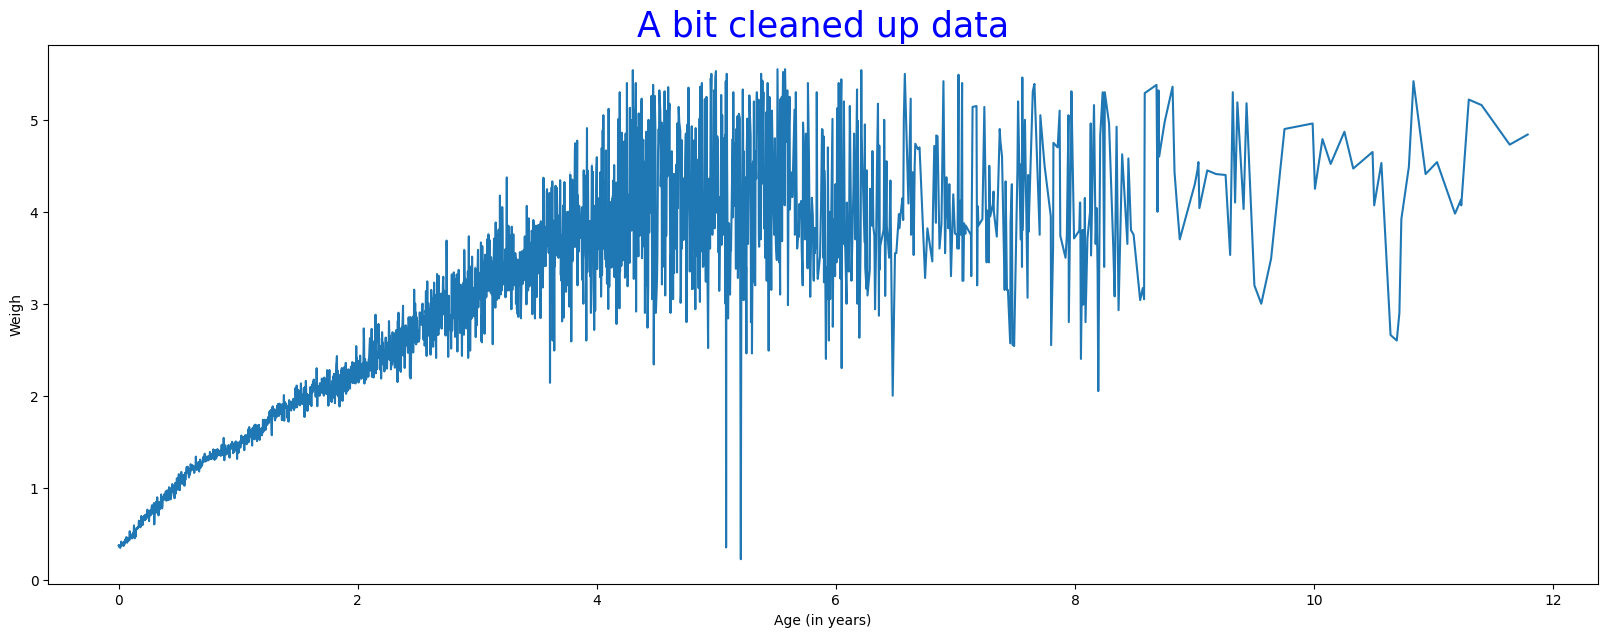

In [28]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "Age", y = "Weigh", ci = 0, data = df_filtered)
plt.ylabel('Weigh')
plt.xlabel('Age (in years)')
plt.title("A bit cleaned up data", size=25, color= 'blue')
plt.show()

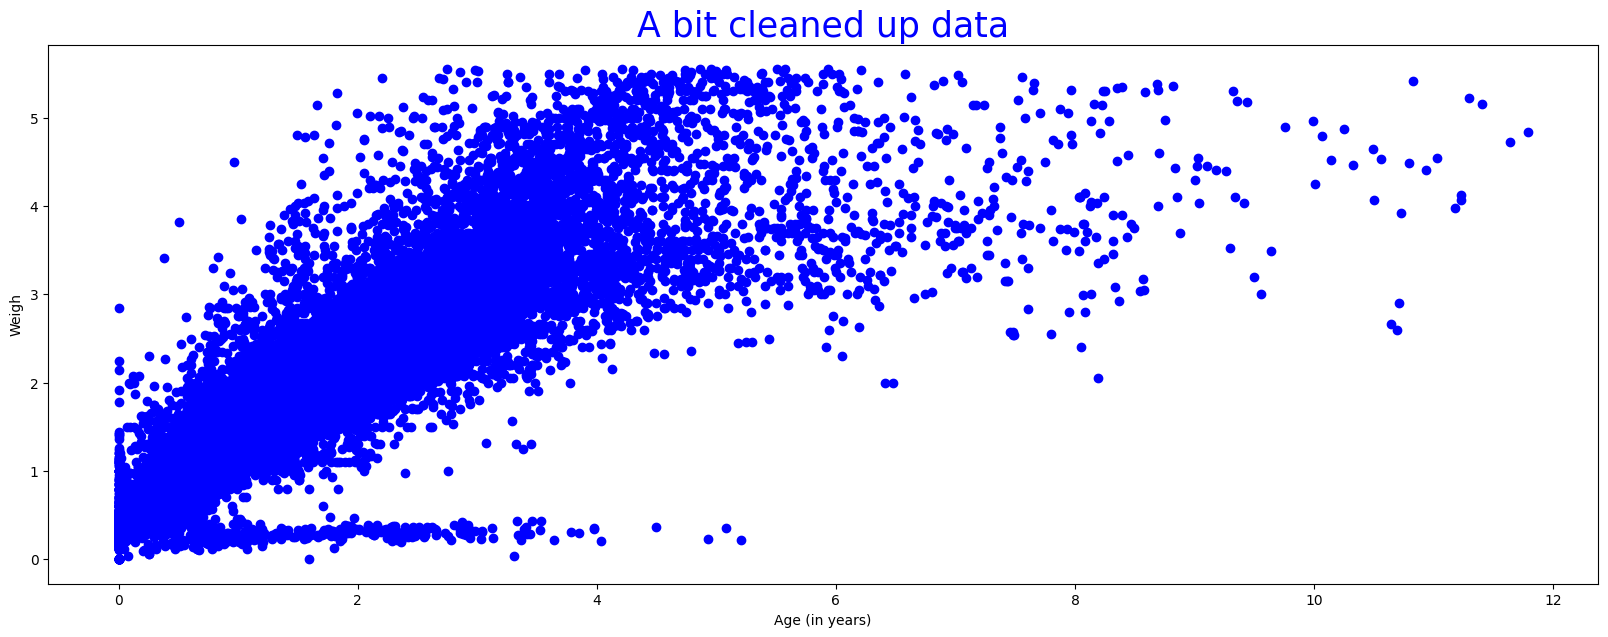

In [29]:
plt.figure(figsize = (20, 7))
plt.scatter(df_filtered.Age, df_filtered.Weigh, color='blue')
plt.ylabel('Weigh')
plt.xlabel('Age (in years)')
plt.title("A bit cleaned up data", size=25, color= 'blue')
plt.show()



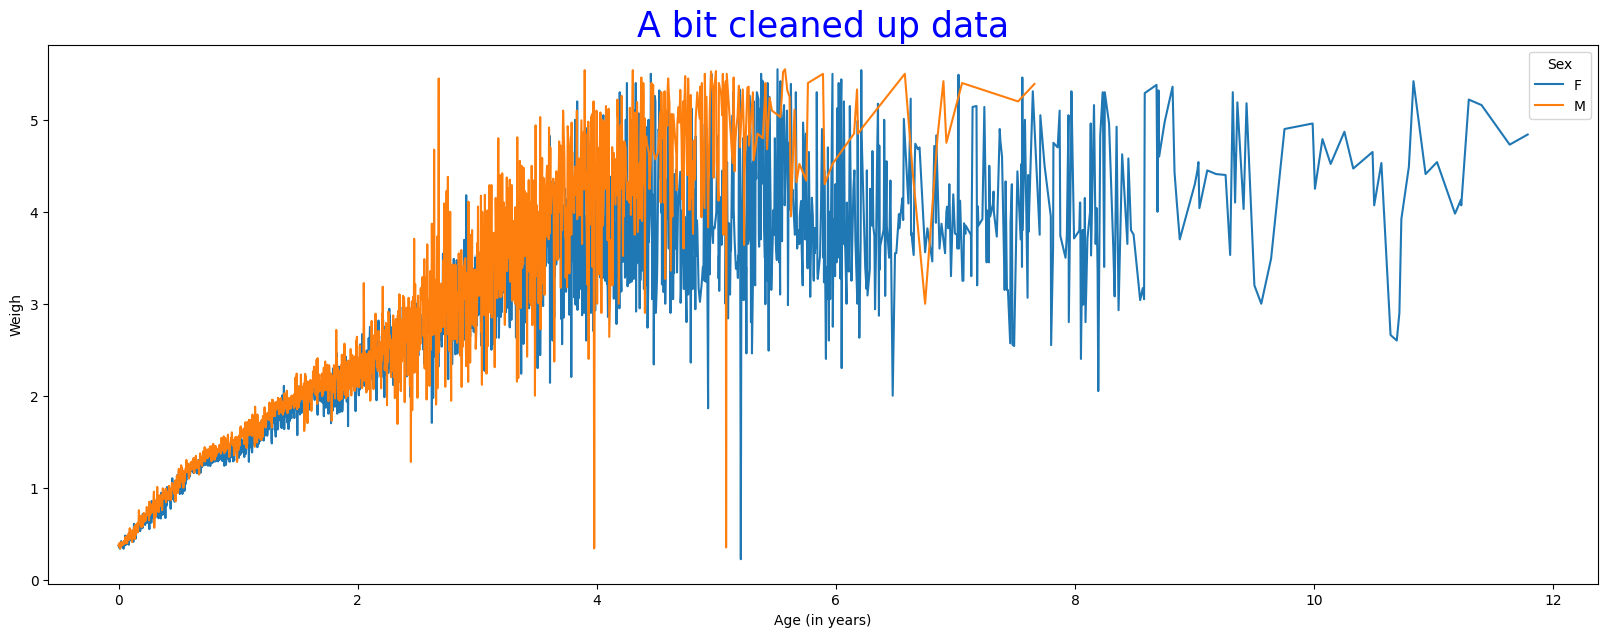

In [30]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "Age", y = "Weigh", ci = 0, data = df_filtered, hue = 'Sex')
plt.ylabel('Weigh')
plt.xlabel('Age (in years)')
plt.title("A bit cleaned up data", size=25, color= 'blue')
plt.show()

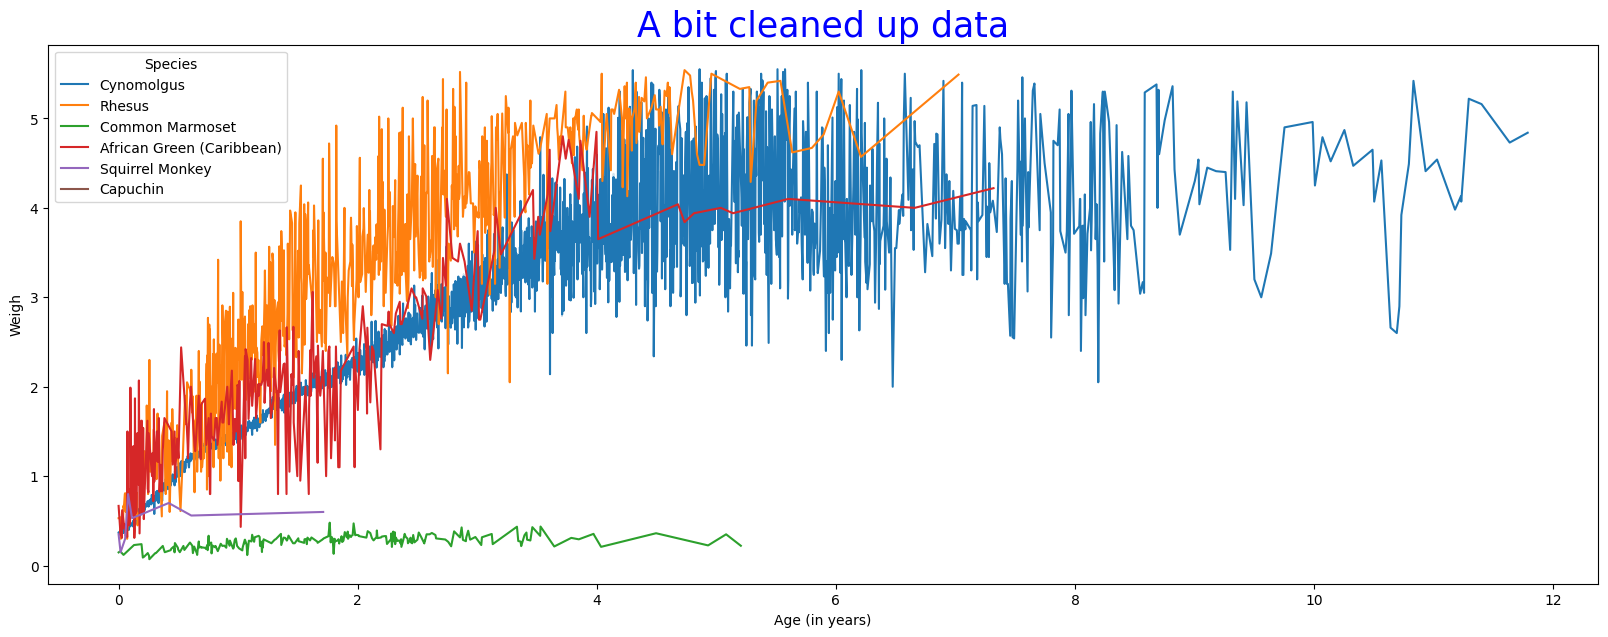

In [31]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "Age", y = "Weigh", ci = 0, data = df_filtered, hue = 'Species')
plt.ylabel('Weigh')
plt.xlabel('Age (in years)')
plt.title("A bit cleaned up data", size=25, color= 'blue')
plt.show()

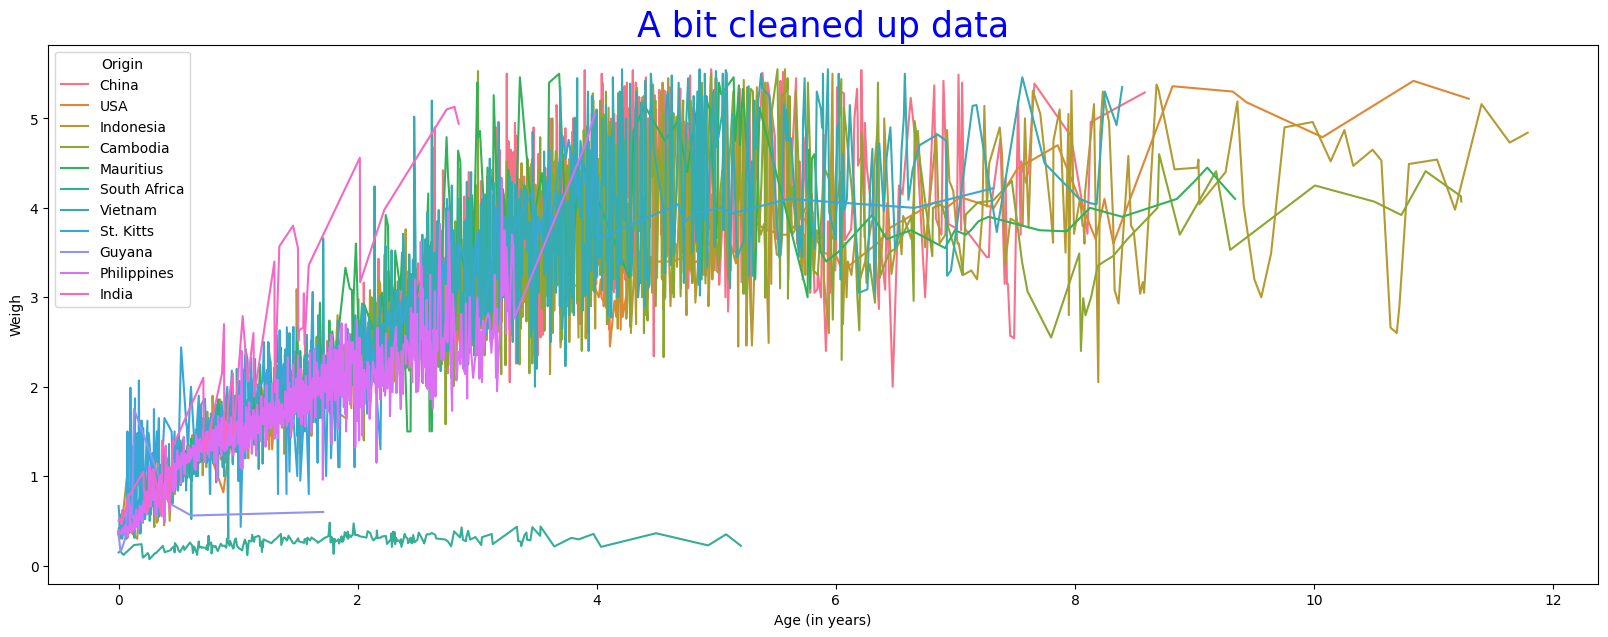

In [32]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "Age", y = "Weigh", ci = 0, data = df_filtered, hue = 'Origin')
plt.ylabel('Weigh')
plt.xlabel('Age (in years)')
plt.title("A bit cleaned up data", size=25, color= 'blue')
plt.show()

**Model building**

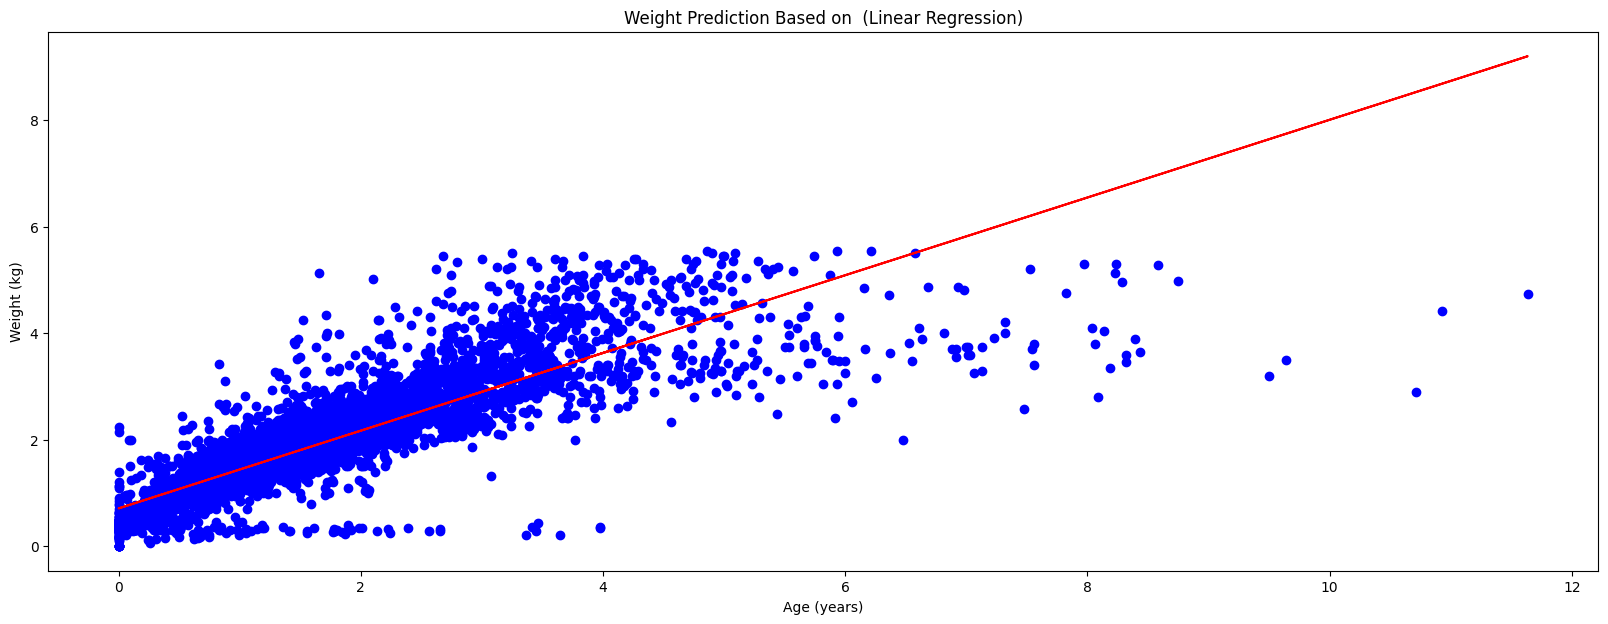

Mean Absolute Error (MAE): 0.32602716952896893
Mean Squared Error (MSE): 0.2463570530352178
Root Mean Squared Error (RMSE): 0.49634368439138804


In [33]:


# Sample data: age and weight of animals
ages = df_filtered[['Age']]  # Age of animals
weights = df_filtered[['Weigh']] # Weight of animals

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ages, weights, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize = (20, 7))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Weight Prediction Based on  (Linear Regression)')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.show()


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

In [34]:


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model using standardized data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the standardized testing data
y_pred_scaled = model.predict(X_test_scaled)

# Calculate error metrics on standardized data
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

# Print error metrics
print('Mean Absolute Error (MAE) on standardized data:', mae_scaled)
print('Mean Squared Error (MSE) on standardized data:', mse_scaled)
print('Root Mean Squared Error (RMSE) on standardized data:', rmse_scaled)


Mean Absolute Error (MAE) on standardized data: 0.326027169528969
Mean Squared Error (MSE) on standardized data: 0.2463570530352178
Root Mean Squared Error (RMSE) on standardized data: 0.49634368439138804


Mean Absolute Error (MAE): 0.2662990417372322
Mean Squared Error (MSE): 0.18716358526534962
Root Mean Squared Error (RMSE): 0.4326240692163921
R-squared (R2) Score: 0.8243535200659038


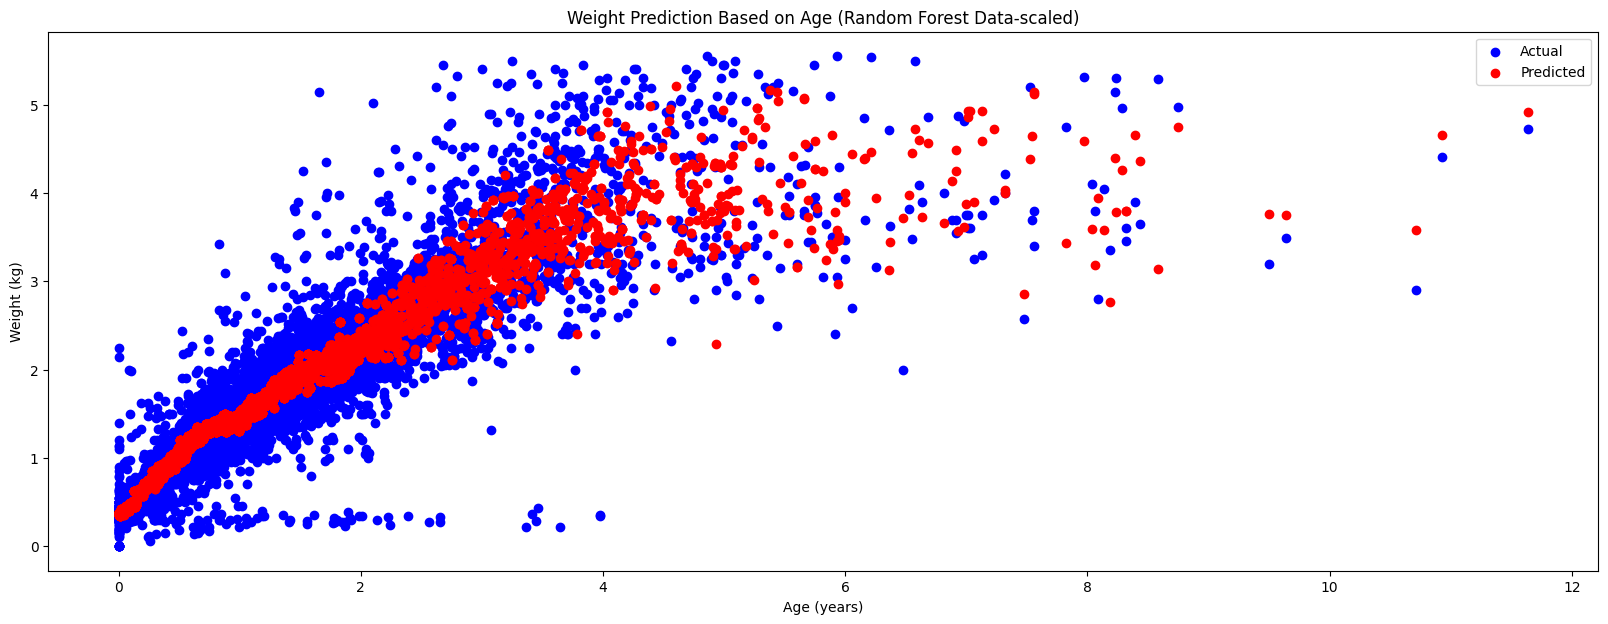

In [35]:


X = df_filtered[['Age']]  # Age of animals
y = df_filtered[['Weigh']] # Weight of animals

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)

# Plot the actual and predicted values
plt.figure(figsize = (20, 7))
plt.scatter(X_test.values, y_test, color='blue', label='Actual')
plt.scatter(X_test.values, y_pred, color='red', label='Predicted')
plt.title('Weight Prediction Based on Age (Random Forest Data-scaled)')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 0.26642152970750704
Mean Squared Error (MSE): 0.18746772518054028
Root Mean Squared Error (RMSE): 0.43297543253692844
R-squared (R2) Score: 0.8240680953908264


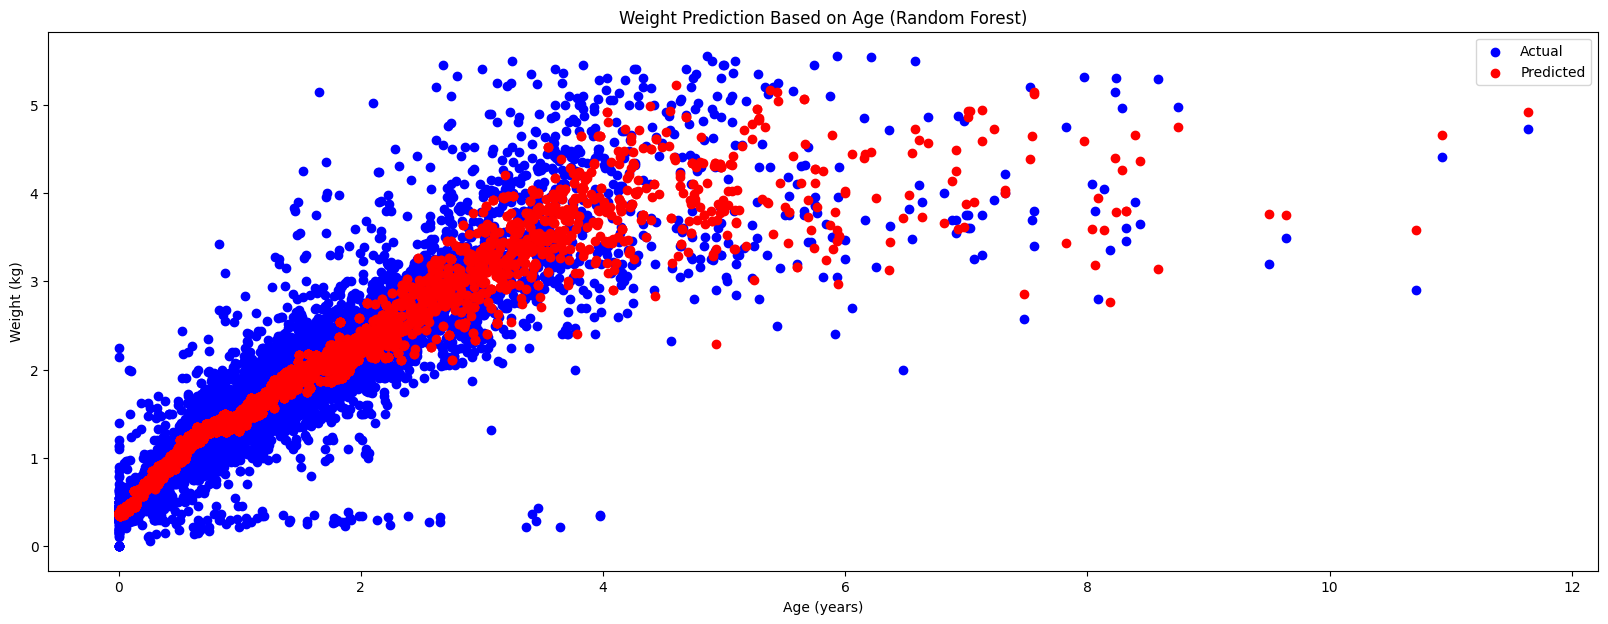

In [36]:

X = df_filtered[['Age']]  # Age of animals
y = df_filtered[['Weigh']] # Weight of animals

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)

# Plot the actual and predicted values
plt.figure(figsize = (20, 7))
plt.scatter(scaler.inverse_transform(X_test), y_test, color='blue', label='Actual')
plt.scatter(scaler.inverse_transform(X_test), y_pred, color='red', label='Predicted')
plt.title('Weight Prediction Based on Age (Random Forest)')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()


In [37]:
#df_cleaned = df.dropna() #drop NAN values
#df_cleaned.info()
#df_filtered = df_cleaned[(df_cleaned['Age'] >= 0) & (df_cleaned['Weigh'] < df_cleaned['Weigh'].std())]
f_filtered_s = df_cleaned[(df_cleaned['Age'] > 0) & (df_cleaned['Species'] == 'Cynomolgus') & (df_cleaned['Weigh'] < df_cleaned['Weigh'].std())]
#& (df_cleaned['Origin'] == 'Cambodia')


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Mean Absolute Error (MAE): 0.23617718550769698
Mean Squared Error (MSE): 0.12265149694444079
Root Mean Squared Error (RMSE): 0.35021635733420675
R-squared (R2) Score: 0.8580752504497691


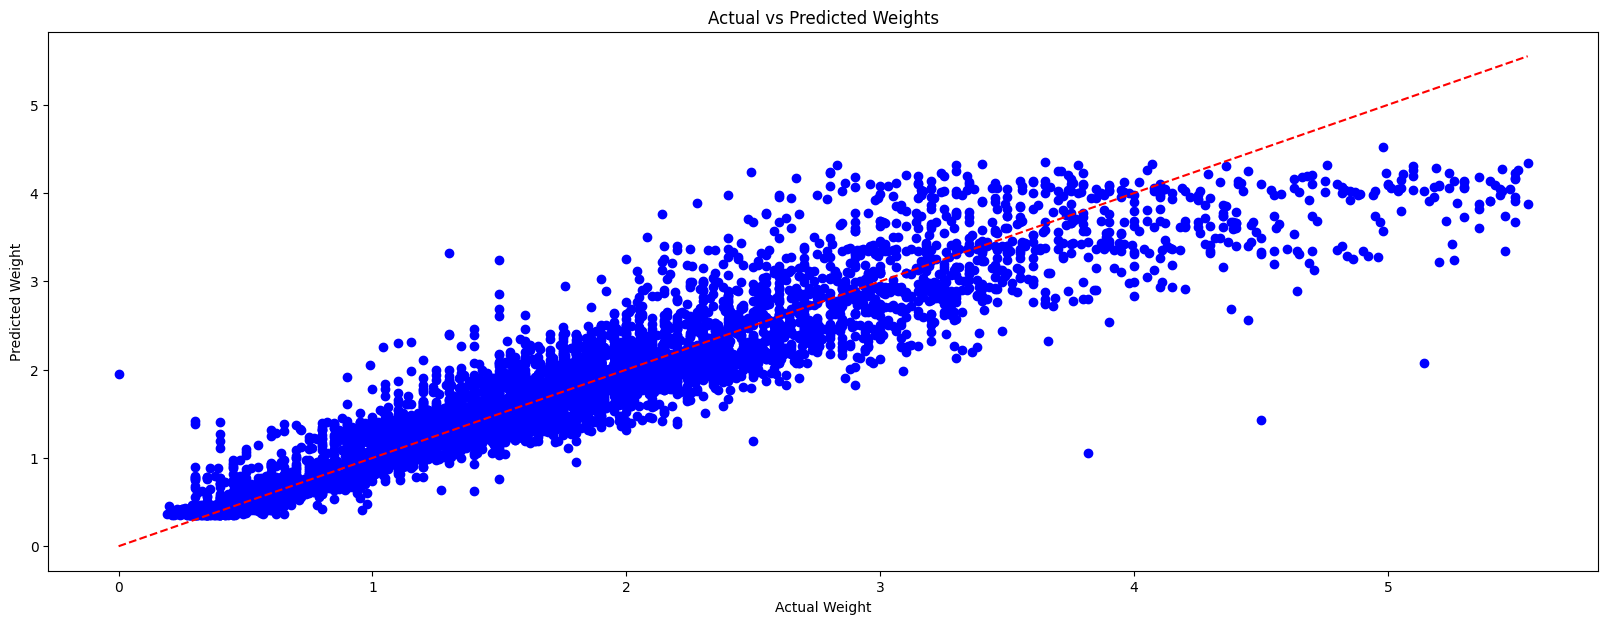

In [38]:


X = f_filtered_s[['Age']]  # Age of animals
y = f_filtered_s[['Weigh']] # Weight of animals


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Best hyperparameters:', grid_search.best_params_)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)



# Plot actual vs predicted weights
plt.figure(figsize = (20, 7))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weights')
plt.show()


Mean Absolute Error (MAE): 0.2665442575796917
Mean Squared Error (MSE): 0.18766916660468363
Root Mean Squared Error (RMSE): 0.4332079946223103
R-squared (R2) Score: 0.8238790496583805


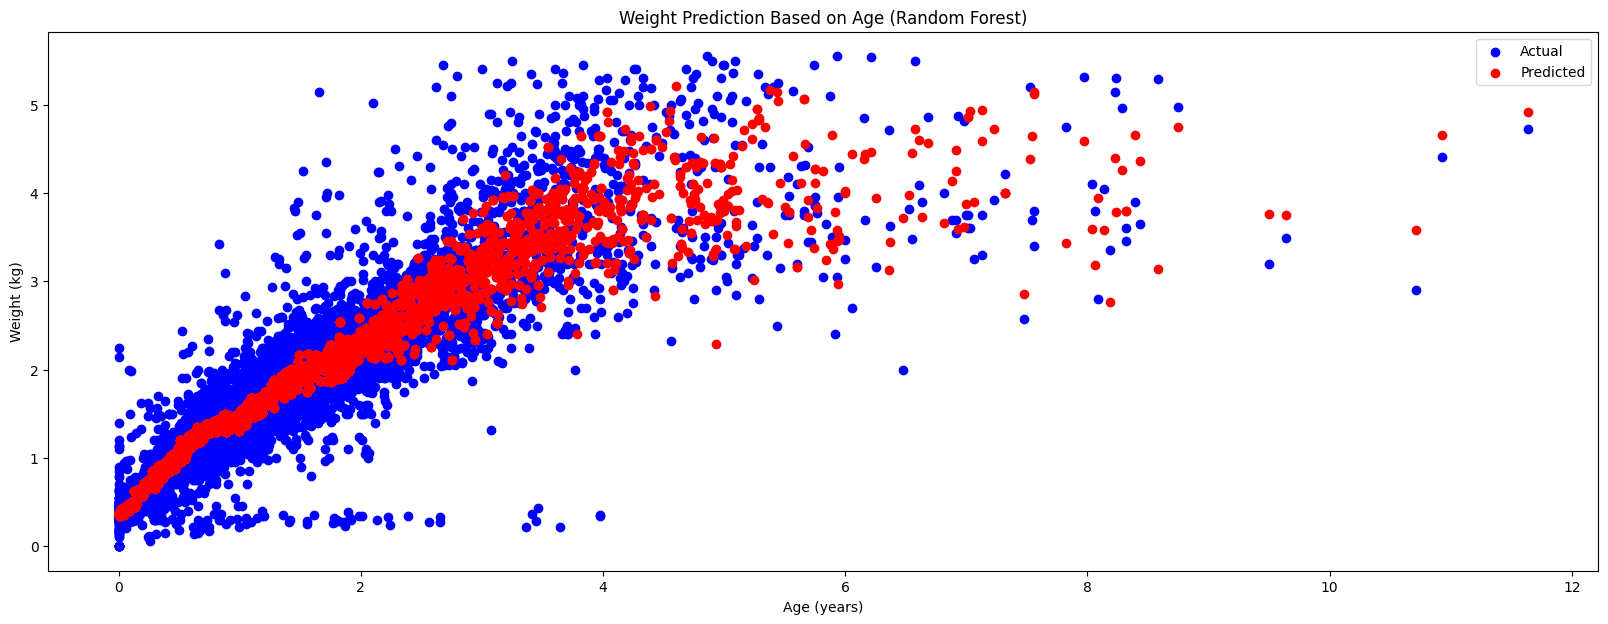

In [39]:
X = df_filtered[['Age']]  # Age of animals
y = df_filtered[['Weigh']] # Weight of animals

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)

# Plot the data and predicted values
plt.figure(figsize = (20, 7))
plt.scatter(X_test.values, y_test, color='blue', label='Actual')
plt.scatter(X_test.values, y_pred, color='red', label='Predicted')
plt.title('Weight Prediction Based on Age (Random Forest)')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()


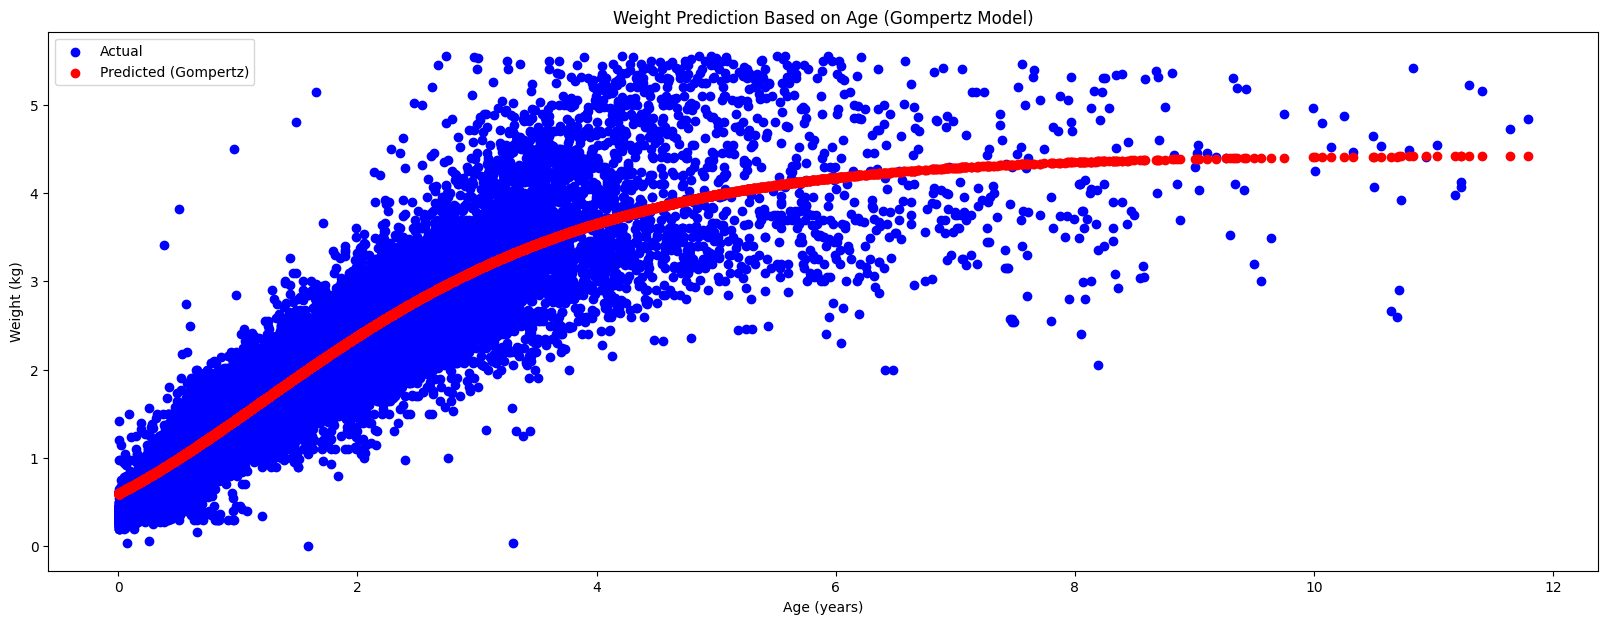

Estimated parameters (A, b, c): [4.43097701 0.58571264 1.19003199]
Mean Absolute Error (MAE): 0.2545634697202422
Mean Squared Error (MSE): 0.12833002534270643
Root Mean Squared Error (RMSE): 0.35823180392408827
R-squared (R2) Score: 0.8522793009099912


In [40]:


# Gompertz model function
def gompertz_model(t, A, b, c):
    return A * np.exp(-np.exp(-b * (t - c)))

ages =    f_filtered_s['Age'].values
weights = f_filtered_s['Weigh'].values

# Fit the Gompertz model to the data
popt, pcov = curve_fit(gompertz_model, ages, weights, maxfev=10000)

# Predict weights based on the fitted model
predicted_weights = gompertz_model(ages, *popt)

# Plot the data and the fitted curve
plt.figure(figsize = (20, 7))
plt.scatter(ages, weights, color='blue', label='Actual')
plt.scatter(ages, predicted_weights, color='red', label='Predicted (Gompertz)')

plt.title('Weight Prediction Based on Age (Gompertz Model)')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

print('Estimated parameters (A, b, c):', popt)


# Calculate error metrics
mae = mean_absolute_error(weights, predicted_weights)
mse = mean_squared_error(weights, predicted_weights)
rmse = np.sqrt(mse)
r2 = r2_score(weights, predicted_weights)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)
